# ML: Polynomial, Bias-Variance,Regularisation

### Polynomial

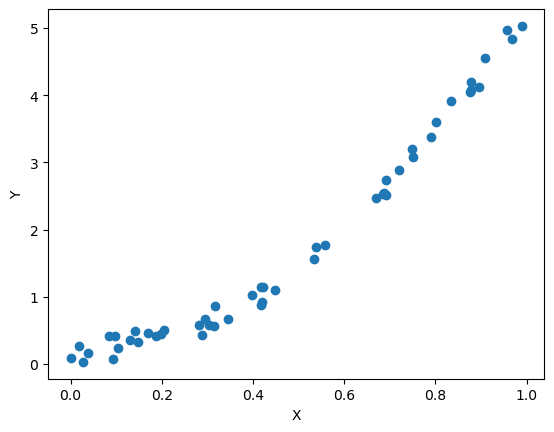

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(50, 1)
# leveraging element wise operations
y = 0.7*(X ** 5) -\
    2.1*(X ** 4) +\
    2.7*(X ** 3) +\
    3.5*(X ** 2) +\
    0.3* X + \
    0.4*np.random.rand(50,1)  # no data in world is perfect
fig = plt.figure()
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Would a straight do our job here? No.
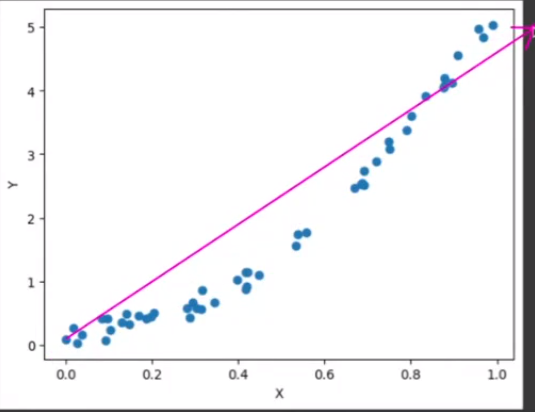

How about we try something polynomial like this:
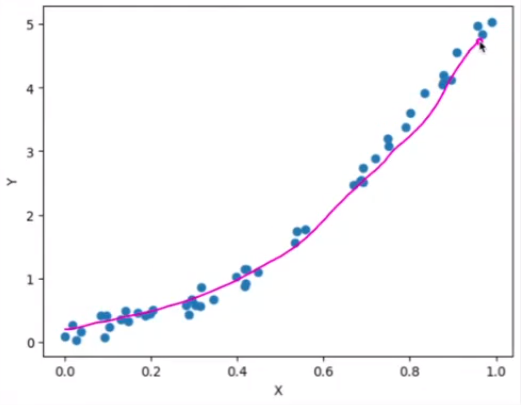

In [22]:
def adj_r(r_sq, X, Y):
    adj_r = (1 - ((1 - r_sq) * (len(Y) - 1))/(len(Y)-X.shape[1] - 1))
    return adj_r

In [23]:
def r2_score(y, y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1 - num/denom)
    return score

In [24]:
X.shape, y.shape # we have only 1 feature in our predictors

((50, 1), (50, 1))

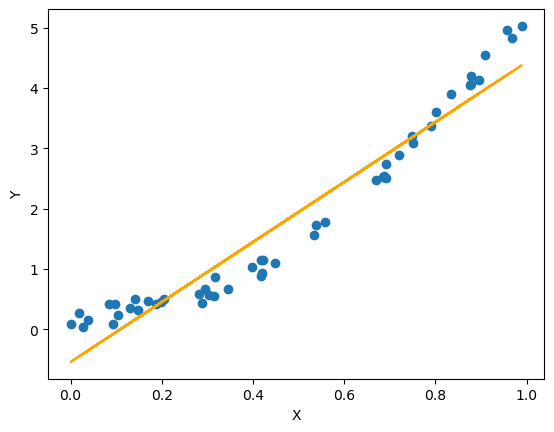

Adj. R-square:  0.9332371047707784


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
output = model.predict(X)

fig = plt.figure()
plt.scatter(X, y, label='samples')
plt.plot(X, output, label='prediction', color = 'orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print('Adj. R-square: ', adj_r(r2_score(y, output), X, y))

Even with a straight line, Adj. R-square is 0.933

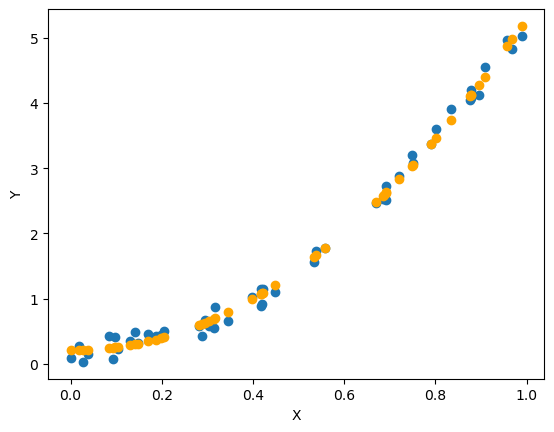

Adj. R-square:  0.9947910474710182


In [27]:
X_deg2 = np.hstack([X, X**2])

model = LinearRegression()
model.fit(X_deg2, y)
output = model.predict(X_deg2)

fig = plt.figure()
plt.scatter(X, y, label='samples')
plt.scatter(X, output, label='prediction', color = 'orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print('Adj. R-square: ', adj_r(r2_score(y, output), X, y))

Your model has implement a quadratic equation.<br>The adj. R-square has already become 0.99<br>This means that most of the data is being explained by my quadratic equation. This is because we gave x^2 more weightage in our y equation in the beginning.

###### how come a LR turn out to be a curve, but not a line?

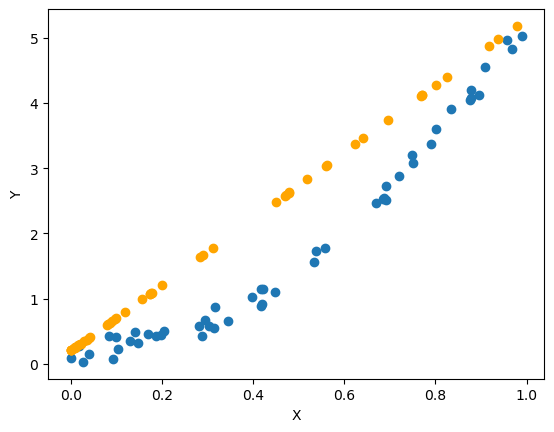

Adj. R-square:  0.9947910474710182


In [28]:
# In terms of x^2, it's a line.

X_deg2 = np.hstack([X, X**2])

model = LinearRegression()
model.fit(X_deg2, y)
output = model.predict(X_deg2)

fig = plt.figure()
plt.scatter(X, y, label='samples')
plt.scatter(X**2, output, label='prediction', color = 'orange')  ## seeing the same thing in terms of x^2
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print('Adj. R-square: ', adj_r(r2_score(y, output), X, y))

Adj. R-square for Model Degree 1: 0.9318166176382416


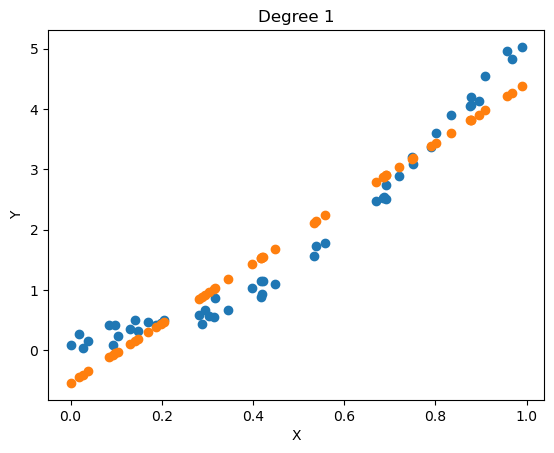

Adj. R-square for Model Degree 2: 0.994564571274106


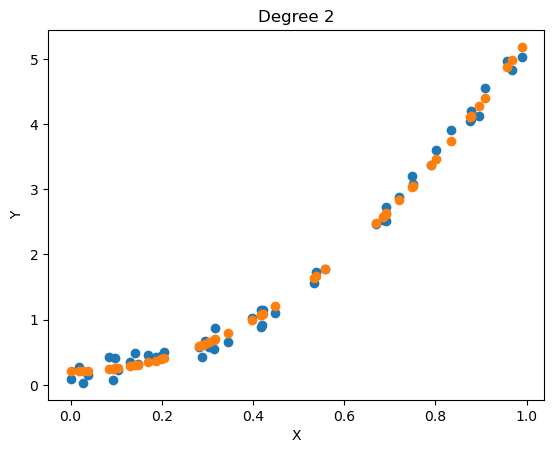

Adj. R-square for Model Degree 3: 0.9944735532438161


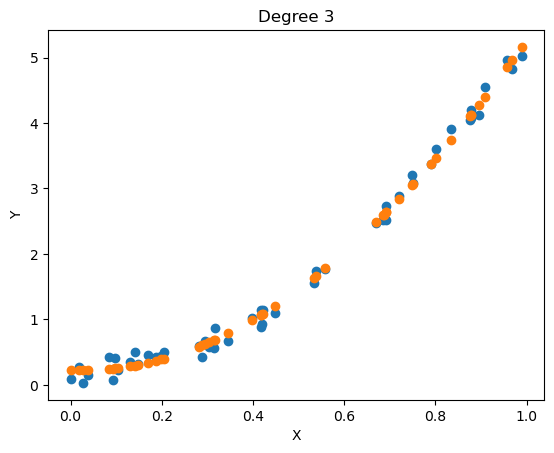

Adj. R-square for Model Degree 4: 0.9954971261912255


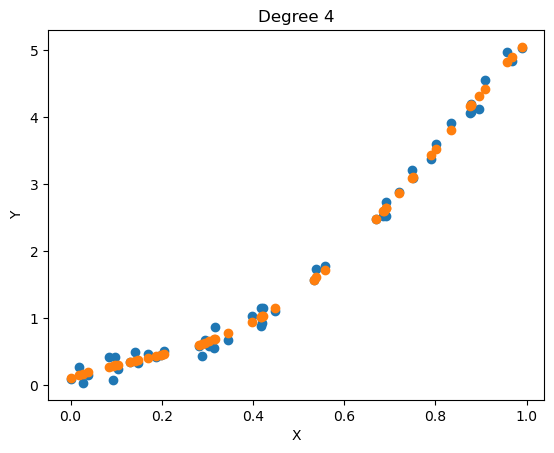

Adj. R-square for Model Degree 5: 0.995442243943045


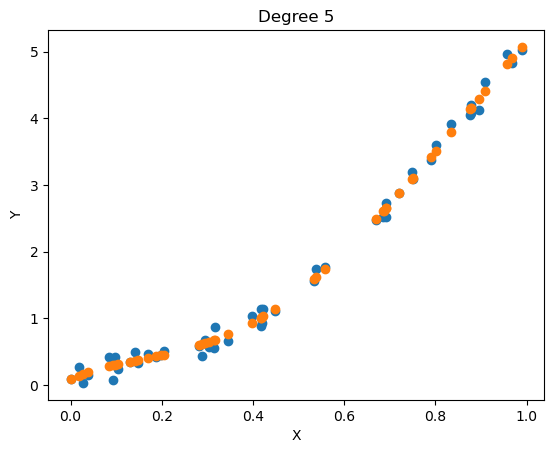

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model  
for i in range(1, 6):

    # Creates polynomial features
    poly = PolynomialFeatures(i)  # Initializes a PolynomialFeatures object with the current degree i.
    # Generates polynomial features based on the input data X using the specified degree i.
    X_poly = poly.fit_transform(X)  
    
    # Standardization
    scaler = StandardScaler()  # Initializes a StandardScaler object for standardizing the polynomial features.
    scaler.fit(X_poly)  # Computes the mean and standard deviation of the polynomial features.
    # Standardizes the polynomial features by subtracting the mean and dividing by the standard deviation.
    X_poly_scaled = scaler.transform(X_poly)      
    # Training the model 
    model = LinearRegression()  # Create a linear regression model object
    model.fit(X_poly_scaled, y)  # Fit the model to the scaled polynomial features and target
    
    # Prediction
    output = model.predict(X_poly_scaled)  # Predict the target variable using the trained model
    
    # Plotting 
    print(f'Adj. R-square for Model Degree {i}: {adj_r(r2_score(y, output), X_poly_scaled, y)}')
    
    fig = plt.figure()  # Create a new figure for plotting
    plt.scatter(X, y, label="samples")  # Scatter plot of the original data points
    plt.scatter(X, output, label="prediction")  # Scatter plot of the predicted values
    plt.xlabel("X")  # Set the x-axis label
    plt.ylabel("Y")  # Set the y-axis label
    plt.title(f"Degree {i}")  # Set the title of the plot
    plt.show()  # Show the plot


Degree 5 gives the best output. But, in real world, you'd rather use degree 2 equation as it's simpler and enough.

model with degree 1 equation is underfitting and model with degree 5 is overfitting as it's learning too much from the data.

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/